In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1)

In [6]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

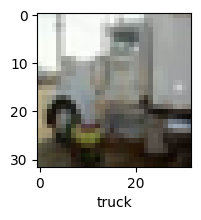

In [12]:
plot_sample(X_train,y_train,31)

In [11]:
classes=['airplane','automobile','bird',"cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def contour(X,y,index):

    image_data=X[index]
    
    gray_picture = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_picture, 34, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour_image = image_data.copy()  # Create a copy of the original image for drawing
    
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green
    resized_image = cv2.resize(contour_image, (500, 1000))

    # Show or save the resulting image with contours
    cv2.imshow("contours",resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
           


In [14]:
X_train[1].shape
X_train[1].dtype

dtype('uint8')

In [15]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [16]:
image_data=X_train[1]
gray_picture = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
# cv2.imshow("gray image",gray_picture)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
contour(X_train,y_train,1)

In [ ]:
resized_image = cv2.resize(gray_picture, (500, 1000))

blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
enhanced_image = cv2.addWeighted(resized_image, 1.5, laplacian, -0.5, 0)

cv2.imshow("enhanced image",enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

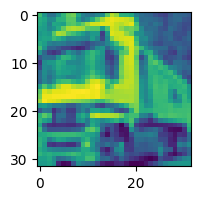

In [25]:
kernel=np.ones((1,1),np.uint8)
dst=cv2.filter2D(gray_picture,-1,kernel)
# cv2.imshow("convolutional  image",dst)
plt.figure(figsize=(15,2))
plt.imshow(dst)
